In [1]:
import tensorflow as tf

In [2]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    brightness_range=[0.7, 1.3],
    rotation_range = 30
)

In [3]:
train_generator = datagen.flow_from_directory(
    directory=r"New_Data/train",
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2030 images belonging to 5 classes.


In [4]:
valid_generator = datagen.flow_from_directory(
    directory=r"New_Data/test/",
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 554 images belonging to 5 classes.


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(250, 250, 3))
base_model.trainable = False 

In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [7]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 15,970,263
Trainable params: 1,255,575
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [10]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks=[es]
)

Epoch 1/50
63/63 [==============================] - 48s 577ms/step - loss: 0.8946 - accuracy: 0.6777 - val_loss: 0.3606 - val_accuracy: 0.9320
Epoch 2/50
63/63 [==============================] - 33s 530ms/step - loss: 0.2283 - accuracy: 0.9560 - val_loss: 0.1135 - val_accuracy: 0.9724
Epoch 3/50
63/63 [==============================] - 34s 535ms/step - loss: 0.0784 - accuracy: 0.9870 - val_loss: 0.0747 - val_accuracy: 0.9908
Epoch 4/50
63/63 [==============================] - 34s 536ms/step - loss: 0.0508 - accuracy: 0.9935 - val_loss: 0.0380 - val_accuracy: 0.9926
Epoch 5/50
63/63 [==============================] - 34s 534ms/step - loss: 0.0289 - accuracy: 0.9965 - val_loss: 0.0256 - val_accuracy: 0.9945
Epoch 6/50
63/63 [==============================] - 33s 530ms/step - loss: 0.0176 - accuracy: 0.9990 - val_loss: 0.0190 - val_accuracy: 0.9982
Epoch 7/50
63/63 [==============================] - 33s 527ms/step - loss: 0.0152 - accuracy: 0.9990 - val_loss: 0.0122 - val_accuracy: 0.9982

In [11]:
import matplotlib.pyplot as plt

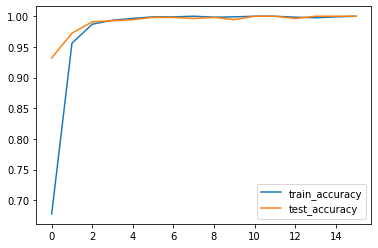

In [13]:
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="test_accuracy")
plt.legend(loc=4)
plt.show()

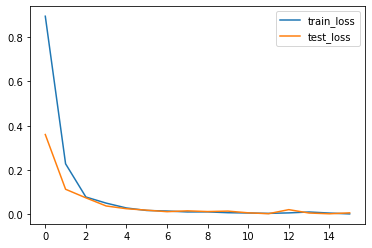

In [14]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="test_loss")
plt.legend(loc=1)
plt.show()

In [12]:
model.save('face_rec.h5')

In [15]:
model.evaluate(valid_generator)

18/18 [==============================] - 9s 478ms/step - loss: 0.0066 - accuracy: 1.0000


[0.006610911339521408, 1.0]

In [14]:
from PIL import Image

In [15]:
import numpy as np

In [16]:
def predict(img, model):
    image = Image.open(img)
    imagearr = np.asarray(image)
    imagearr = np.asarray([imagearr/255])
    label = np.argmax(model.predict(imagearr))
    return(label)

In [17]:
img = 'New_Data/test/Alfred/Alfreda2ccec88-ad67-436e-9274-b76a8c02ffe1.jpg'
predict(img, model)

1/1 [==============================] - 1s 1s/step


0

In [18]:
predict('New_Data/test/Lijo/Lijocd4b0d83-c494-4017-aea4-d3cd913fe3e4.jpg', model)

1/1 [==============================] - 0s 18ms/step


1

In [19]:
img = 'New_Data/test/Vineeth/Vineethdf932a0f-814f-47b0-91fe-c8d7df4d460b.jpg'
predict(img, model)

1/1 [==============================] - 0s 21ms/step


3

In [20]:
train_generator.class_indices

{'Alfred': 0, 'Lijo': 1, 'Sarath': 2, 'Vineeth': 3, 'sharu': 4}